In [104]:
import requests
from bs4 import BeautifulSoup
import time
import datetime
import csv
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [94]:
url = "https://www.google.com/search?q=samsung+mobile&rlz=1C5GCEM_enIN990IN990&oq=samsung+mobile&aqs=chrome.0.0i271j46i199i433i465i512j69i64j0i131i433i457i512j0i402i512j69i61l2j69i60.3891j0j7&sourceid=chrome&ie=UTF-8"

In [21]:
def scrape_google_search_ads(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

    response = requests.get(url, headers=headers)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, 'html.parser')
    
    ads_data = []

    ads = soup.select("div[data-async-context='query:SERP'] .uEierd")
    for ad in ads:
        title = ad.select_one(".m78ae")
        link = ad.select_one(".Krnil")
        description = ad.select_one(".BmP5tf")
        ad_data = {
            "Title": title.get_text() if title else "",
            "Link": link["href"] if link else "",
            "Description": description.get_text() if description else ""
        }
        ads_data.append(ad_data)

    return ads_data
scrape_google_search_ads(url)


[]

In [22]:
def scrape_ads_data(url):
    options = Options()
    options.headless = True
    chromedriver_path = "./chromedriver"
    driver = webdriver.Chrome(service=ChromeService(executable_path=chromedriver_path), options=options)

    try:
        driver.get(url)
        WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'mnr-c') or contains(@class, 'c3mZkd') or contains(@class, 'pla-unit')]")))

        ads_data = []
        ads = driver.find_elements(By.XPATH, "//div[contains(@class, 'mnr-c') or contains(@class, 'c3mZkd') or contains(@class, 'pla-unit')]")
        for ad in ads:
            image_url = ad.find_element_by_xpath("//img[@id='platop0']").get_attribute('src')
            model_name = ad.find_element_by_xpath("//img[@id='platop0']").get_attribute('alt')
            price = "0"#ad.find_element(By.CLASS_NAME, 'pla-unit').text.strip()

            ad_data = [image_url, model_name, price]
            ads_data.append(ad_data)

        return ads_data

    finally:
        driver.quit()
scrape_ads_data(url)

/var/folders/xh/f10dfzgj5fl_b4sl_m3k3mtr0000gn/T/ipykernel_96581/3515160825.py:3: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True


AttributeError: 'WebElement' object has no attribute 'find_element_by_xpath'

b'<!doctype html><html lang="en-IN"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>samsung mobile - Google Search</title><script nonce="DWYauVtC8BcIoyJiAKIgKw">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.go
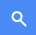
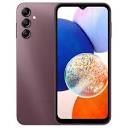
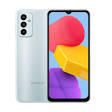
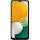

[]

In [25]:
def scrape_ads_data(url):
    response = requests.get(url)
    print(response.content)
    soup = BeautifulSoup(response.content, 'html.parser')

    ads_data = []
    ads = soup.find_all('div', class_='mnr-c c3mZkd pla-unit')
    ads
    for ad in ads:
        image_url = ad.find('img', class_='tvs3Id')['src']
        model_name = ad.find('div', class_='WsMG1c nnK0zc').text.strip()
        price = ad.find('span', class_='a8Pemb').text.strip()

        # Add more information fields here if needed.

        ad_data = [image_url, model_name, price]
        ads_data.append(ad_data)

    return ads_data

scrape_ads_data(url)

In [6]:
def save_to_csv(data, file_name):
    with open(file_name, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ["Image", "model_name", "price","from"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for ad in data:
            writer.writerow(ad)
if __name__ == "__main__":
    search_query = "Samsung Mobile"  # Replace this with your actual search query
    url = f"https://www.google.com/search?q={search_query}&ads"

    scraped_ads_data = scrape_google_search_ads(url)
    save_to_csv(scraped_ads_data, "google_ads.csv")

In [19]:
# using parsel
# handles both top and right side shopping results
from parsel import Selector
import requests, json
# https://docs.python-requests.org/en/master/user/quickstart/#passing-parameters-in-urls
params = {
    "q": "samsung mobile",
    "hl": "en",
    "gl": "us"
    }
# https://docs.python-requests.org/en/master/user/quickstart/#custom-headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    }
html = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=30)

selector = Selector(html.text)
print(selector.css)
data = []
# if top block shopping ads appears
if selector.css(".commercial-unit-desktop-top").get():
    for index, shopping_ad in enumerate(selector.css(".mnr-c.pla-unit"), start=1):
        title = shopping_ad.css(".pymv4e::text").get()
        link = shopping_ad.css(".pla-unit-title-link::attr(href)").get()
        price = shopping_ad.css(".e10twf::text").get()
        source = shopping_ad.css(".LbUacb .zPEcBd::text").get()
        data.append({
            "position": index,
            "block_position": "top_block",
            "title": title,
            "link": link,
            "price": price,
            "source": source
            })
# if right block shopping ads appears
elif selector.css(".commercial-unit-desktop-rhs").get():
    for index, shopping_ad in enumerate(selector.css(".mnr-c.pla-unit"), start=1):
        title = shopping_ad.css(".pymv4e::text").get()
        link = shopping_ad.css(".pla-unit-title-link::attr(href)").get()
        price = shopping_ad.css(".e10twf::text").get()
        source = shopping_ad.css(".LbUacb::text, .zPEcBd::text").get()
        data.append({
            "position": index,
            "block_position": "right_block",
            "title": title,
            "link": link,
            "price": price,
            "source": source
            })
print(json.dumps(data, indent=2, ensure_ascii=False))

<bound method Selector.css of <Selector query=None data='<html itemscope="" itemtype="http://s...'>>
[]


## Correct code starts here

In [70]:
def save_to_csv(data, csv_filename):
    # Open the CSV file in write mode
    fieldnames = ["Image", "image_desc","model_name", "price","from"]
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

In [106]:
import requests

def fetch_html(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for any request errors
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error fetching HTML: {e}")
        return None

# Replace 'your_url_here' with the actual URL of the web page you want to fetch
html_code = fetch_html(url)

soup = BeautifulSoup(html_code, 'html.parser')
ads_data = []
ads = soup.find_all('div', class_=['qvfQJe'])
print(ads)
for ad in ads:
    image_url = ad.find('img')['src']
    image_description = ad.find('img')['alt']
    model_name = ad.find('div', class_='Wk3jdb tNxQIb').text.strip()
    price = ad.find('div', class_='pSNTSe').text.strip()
    from_comp = ad.find('div',class_='BZuDuc').text.strip()

    ad_data = [image_url, model_name, price,from_comp]
    ads_data.append({
            "Image": image_url,
        "image_desc": image_description,
            "model_name": model_name,
            "price": price,
            "from": from_comp
            })


[<div class="qvfQJe"><div class="sx8gIb wYFOId V5RDwd M09uTc VZeIee" style="width:128px"><div style="height:240px"><a class="vGg33Ymfm0s__pla-unit vGg33Ymfm0s__pla-unit-link" data-catalog-id="8279755652886080051" data-hveid="CAwQBg" data-impdclcc="1" data-merchant-id="141020976" data-offer-id="B0B4F2XCK3" data-slot="4" data-ved="2ahUKEwjEn6v42qGAAxWtqJUCHZqQCjkQwg8oAHoECAwQBg" href="http://www.google.com/aclk?sa=l&amp;ai=DChcSEwillLH42qGAAxUVZJEKHUooC-kYABAHGgJjZQ&amp;sig=AOD64_0npUAq6ULIu0lDUUnNzY06-yGk4A&amp;ctype=5&amp;ved=2ahUKEwjEn6v42qGAAxWtqJUCHZqQCjkQwg8oAHoECAwQBg&amp;adurl="><div class="dOeXRe" style="padding-top:4px;padding-bottom:4px;padding-right:4px;padding-left:4px"><div class="Gor6zc" style="display:inline-block;text-align:center;height:120px;width:120px"><span class="h1vhpc"></span><img alt="Image of Samsung - Galaxy M13 (Aqua Green, 6GB, 128GB Storage) | 6000mAh Battery | Upto 12GB RAM with RAM Plus" data-deferred="1" height="120" id="plathumb0" src="data:image/gif;ba

In [113]:
if html_code:
    current_timestamp = datetime.datetime.now().timestamp()
    name_file_saved = f"{str(current_timestamp)}.csv"
    save_to_csv(ads_data,name_file_saved)    

else:
    print("Failed to fetch HTML.")

In [116]:
data_frame = pd.read_csv(name_file_saved)
data_frame.head(20)

,Image,image_desc,model_name,price,from
0,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","Image of Samsung - Galaxy M13 (Aqua Green, 6GB...","Samsung - Galaxy M13 (Aqua Green,","₹12,999",Amazon.in
1,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Image of Samsung - Galaxy M14 5G (4GB RAM) | 1...,Samsung - Galaxy M14 5G (4GB ...,"₹14,990",Samsung.com
2,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","Image of Samsung - Galaxy S20 12GB RAM , 128GB...","Samsung - Galaxy S20 12GB RAM , ...","₹18,400",Ovantica.com
3,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","Image of Samsung - Galaxy S10 (White, 8GB RAM,...","Samsung - Galaxy S10 (White, 8GB ...","₹31,570",Amazon.in
